In [1]:
from HMM import QHMM, PC_HMM

In [2]:
ncl = 16
k = 4
observations = [-0.3, -0.1, 0.1, 0.3]
theta_gen = [0.2, 0.05, 0.2]

generating_model = PC_HMM(k=k,
                      ncl=ncl,
                      theta = theta_gen,
                      observations = observations)

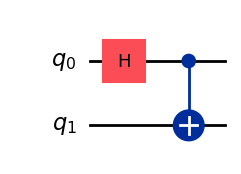

In [3]:
from qiskit import QuantumCircuit

# 2 qubits = 4 hidden states
initial_state = QuantumCircuit(2, name='Initial_State')
initial_state.h(0)
initial_state.cx(0,1)
initial_state.draw('mpl')

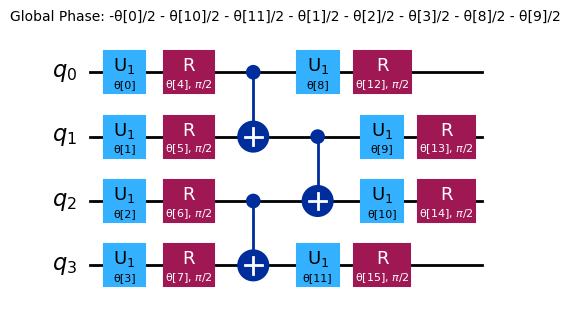

In [4]:
from qiskit.circuit.library import real_amplitudes, efficient_su2

#ansatz = real_amplitudes(3, reps=1)
ansatz = efficient_su2(4, reps=1, entanglement='pairwise', su2_gates=['rz','ry'])
ansatz.decompose(reps=1).draw('mpl')

In [5]:
import numpy as np

# Generating and starting parameters
num_parameters = ansatz.num_parameters

#theta_gen = [np.random.uniform(2*np.pi,  6* np.pi) for _ in range(num_parameters)]
#theta_0_q = [4*np.pi for _ in range(num_parameters)]

theta_0_q = [0 for _ in range(num_parameters)]

In [6]:
# Training Hyperparameters
sequence_length = 20
tol = 1e-6
max_iter = 100

In [ ]:
import numpy as np

# Generating and starting parameters
num_parameters = ansatz.num_parameters

#theta_gen = [np.random.uniform(2*np.pi,  6* np.pi) for _ in range(num_parameters)]
#theta_0_q = [4*np.pi for _ in range(num_parameters)]

theta_0_q = [0 for _ in range(num_parameters)]

In [18]:
sequence = generating_model.generate_sequence(length=sequence_length).tolist()

In [ ]:
from HMM.utils.qhmm_utils import minimize_qhmm

theta_trained, training_time, training_curve = minimize_qhmm(model = training_model_simulator,
              sequence=sequence,
              theta_0=theta_0_q,
              max_iter=max_iter,
              tol=tol)

KeyboardInterrupt: 

In [ ]:
print('Theta_gen: ', theta_gen)
print('Trained theta: ', theta_trained)

Theta_gen:  [0.2, 0.05, 0.2]
Trained theta:  [12.914048982522635, 13.188606161947046, 13.363101288969647, 13.472502949822502, 14.055505315507848, 13.185379344297282, 10.781939205987356, 12.504922255741054, 13.00361428063892, 13.133939225643417, 12.61361806534693, 12.77692143569843, 13.122049408351295, 12.58961468426585, 10.960419532231757, 10.876214974905869]


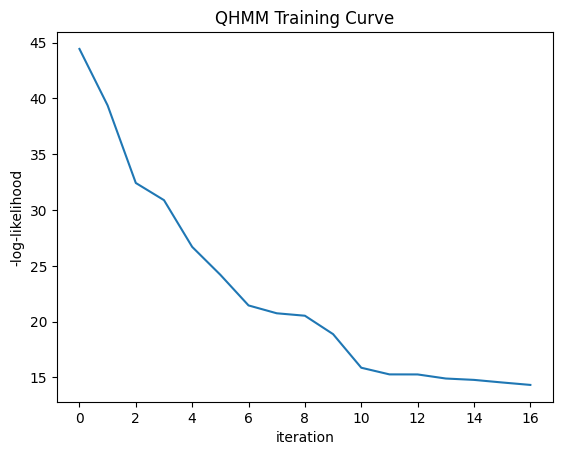

In [ ]:
import matplotlib.pyplot as plt

plt.plot(training_curve)
plt.xlabel('iteration')
plt.ylabel('-log-likelihood')
plt.title('QHMM Training Curve')
plt.show()

In [ ]:
theta_0_c = [0.1, 0.1, 0.1]

model_2 = PC_HMM(k=k,
                ncl=ncl,
                theta=theta_0_c,
                observations = observations)

In [ ]:
from HMM.utils.pc_utils import minimize_pc_hmm

trained_theta, training_time, training_curve = minimize_pc_hmm(model_2,
                                                               theta_0=theta_0_c,
                                                               sequence=sequence,
                                                               max_iter=max_iter,
                                                               tol=tol)

c:\Users\19899\QHMM_MLE\HMM\utils\calculate_probability_density.py:72: RuntimeWarning: invalid value encountered in scalar divide
  probability_dictionary[integrated_volatility] = probability/normalization_constant
c:\Users\19899\anaconda3\envs\QHMM_MLE\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2129: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\Users\19899\anaconda3\envs\QHMM_MLE\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\Users\19899\QHMM_MLE\HMM\utils\calculate_emission_matrix.py:86: RuntimeWarning: invalid value encountered in scalar divide
  probability_dictionary[integrated_volatility] = probability/normalization_constant


ValueError: emissionprob_ rows must sum to 1 (got row sums of [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan])

In [ ]:
import matplotlib.pyplot as plt

plt.plot(training_curve)
plt.xlabel('iteration')
plt.ylabel('-log-likelihood')
plt.title('PC_HMM Training Curve')
plt.show()

In [ ]:
print(training_curve)